In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
from sklearn.model_selection import train_test_split
import xgboost as xgb
import class_function as cf
import copy
import numpy as np

In [84]:
data = pd.read_csv('../Data/del_features_with_K_S.csv')
data.index = data.index + 1
data.loc[0] = ['all', 0.39]
data

,del_feature,K-S
1,REGION_RATING_CLIENT,0.411453
2,FLOORSMAX_AVG,0.411419
3,FLAG_EMP_PHONE,0.409924
4,pre_app_merged_NAME_YIELD_GROUP_low_normal,0.412678
5,bureau_merged_CREDIT_TYPE_Credit card,0.412827
6,pre_app_merged_NAME_CONTRACT_STATUS_Refused,0.412641
7,FLAG_DOCUMENT_3,0.410691
8,pre_app_merged_cash_CNT_INSTALMENT_max_std,0.412497
9,pre_app_merged_PRODUCT_COMBINATION_Card Street,0.411174
10,pre_app_merged_DAYS_LAST_DUE_1ST_VERSION_std,0.411379


In [79]:

data

,del_feature,K-S
1,REGION_RATING_CLIENT,0.411453
2,FLOORSMAX_AVG,0.411419
3,FLAG_EMP_PHONE,0.409924
4,pre_app_merged_NAME_YIELD_GROUP_low_normal,0.412678
5,bureau_merged_CREDIT_TYPE_Credit card,0.412827
6,pre_app_merged_NAME_CONTRACT_STATUS_Refused,0.412641
7,FLAG_DOCUMENT_3,0.410691
8,pre_app_merged_cash_CNT_INSTALMENT_max_std,0.412497
9,pre_app_merged_PRODUCT_COMBINATION_Card Street,0.411174
10,pre_app_merged_DAYS_LAST_DUE_1ST_VERSION_std,0.411379


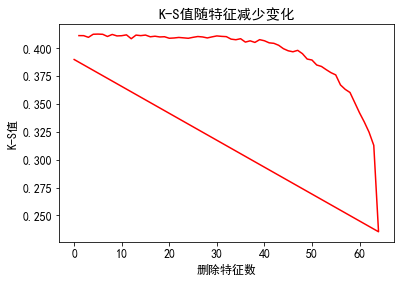

In [82]:
fig, ax = plt.subplots()
ax.set_xlabel('删除特征数')
ax.set_ylabel('K-S值')
ax.set_title('K-S值随特征减少变化')
ax.plot(data.index, data['K-S'], c = 'r')
plt.show()

In [83]:
data.shape

(65, 2)

In [32]:
data = pd.read_csv('../Data/result_iv_selected.csv')
print(data.shape)
data.head()

(307511, 66)


,pre_app_merged_NAME_PAYMENT_TYPE_Cash through the bank,bureau_merged_DAYS_ENDDATE_FACT_max,pre_app_merged_NAME_CONTRACT_STATUS_Approved,bureau_merged_DAYS_ENDDATE_FACT_mean,pre_app_merged_CODE_REJECT_REASON_SCOFR,AMT_ANNUITY,pre_app_merged_DAYS_LAST_DUE_1ST_VERSION_std,pre_app_merged_installments_DAYS_INSTALMENT_min_std,TOTALAREA_MODE,EXT_SOURCE_3,...,ORGANIZATION_TYPE,REGION_RATING_CLIENT,FLAG_EMP_PHONE,FLAG_DOCUMENT_3,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,REG_CITY_NOT_LIVE_CITY,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,TARGET
0,0.000000,0.987530,1.000000,0.916731,0.0,0.090032,0.268323,0.314011,0.014900,0.155054,...,0,0,0,0,0,0,0,0,0,1
1,0.666667,0.812955,1.000000,0.868999,0.0,0.132924,0.003285,0.442411,0.071400,0.569889,...,1,1,0,0,1,1,0,1,0,0
2,1.000000,0.867683,1.000000,0.936429,0.0,0.020025,0.268323,0.314011,0.102547,0.814130,...,2,0,0,1,0,0,0,0,0,0
3,0.444444,0.817462,0.555556,0.884163,0.0,0.109477,0.701032,0.098927,0.102547,0.569889,...,0,0,0,0,2,0,0,0,0,0
4,0.833333,0.728784,1.000000,0.906524,0.0,0.078975,0.003584,0.383059,0.102547,0.569889,...,3,0,0,1,0,0,0,0,1,0


In [33]:
X = data.drop(columns = ['TARGET'])
Y = data.TARGET
print(X.shape)

(307511, 65)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
mxg_cla = cf.Multi_XGB(max_depth=7, n_estimators=200, random_state=0, colsample_bylevel = 0.2, n_jobs = 8)
mxg_cla.train(x_train, y_train)
mxg_cla.predict(x_test)
mxg_cla.cal_K_S(y_test)
mxg_cla.K_S

0.4096665283040108

features = list(X.columns)
del_features = []
K_S_list = []
X_0 = copy.deepcopy(X)
while features:
    X_0 = X_0[features]
    K_S_ = []
    i = 0
    for feature in features:
        X_tmp = X_0.drop(columns = [feature])
        
        x_train, x_test, y_train, y_test = train_test_split(X_tmp, Y, test_size=0.2, random_state=0)
        mxg_cla = cf.Multi_XGB(max_depth=7, n_estimators=200, random_state=0, colsample_bylevel = 0.2, n_jobs = 8)
        mxg_cla.train(x_train, y_train)
        mxg_cla.predict(x_test)
        mxg_cla.cal_K_S(y_test)
        K_S_.append(mxg_cla.K_S)
        print(i)
        i += 1
    
    del_feature = features[np.argmax(K_S_)]
    del_features.append(del_feature)
    K_S_list.append(max(K_S_))
    
    df = pd.DataFrame({'del_feature': del_features, 'K-S': K-S_list})
    df.to_csv('../Data/del_features_with_K_S.csv', index = False, encoding = 'utf-8_sig')
    
    features = features.remove(del_feature)
    print('*' * 10, len(features), '*' * 10)

In [39]:
a = [1, 2, 6, 3]

In [44]:
a = a.remove(a[0])

In [45]:
a

In [46]:
a == None

True

In [63]:
a = [1, 2, 2]

In [64]:
np.argmax(a)

1

In [66]:
a.remove(2)

In [67]:
a

[1, 2]